# Credit Card Fraud Detection

This project is all about comparing the different algorithms(Logistic Regression, Decision Tree, Random Forest) to classify a transaction into 2 categories, i.e. fraud or genuine.
The data set is taken from online kaggle. The dats set can be downloaded from https://www.kaggle.com/mlg-ulb/creditcardfraud 

## Step 1: Loading the data into notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('creditcard.csv')

## Step 2: Exploring data set

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.shape

(284807, 31)

In [5]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [6]:
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

The given data set consist of 31 columns, out of which 28 are anonymized. The remaining features are time,class,Amount.
Class represent type of transaction i.e. 0 means genuine transaction and 1 means fraud transaction.
There are no null values in any of the columns

In [8]:
print(((492/284807)*100))

0.1727485630620034


There are only .17% fraud transactions and rest are genuine.

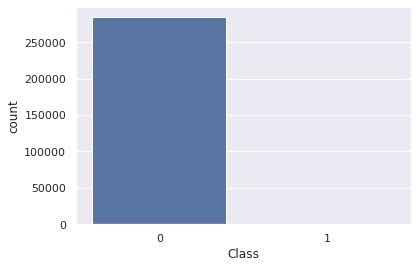

In [9]:
sns.set(style='darkgrid')
sns.countplot('Class',data=df)

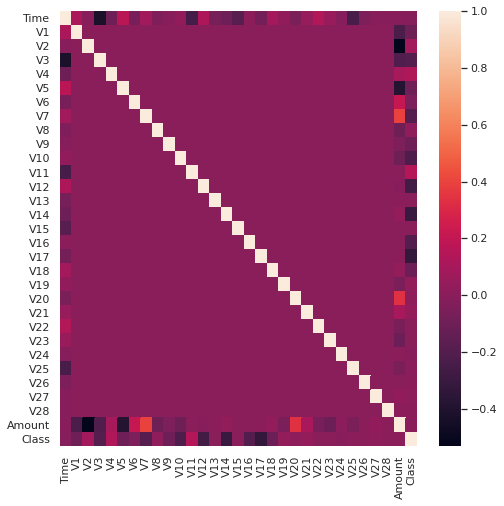

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

We can't extract features because all the features were transformed using PCA(Principal component analysis) and the features don't show the type of correlation with each other

# Step 3: Data sampling

#### Dataframe df contains 284807 transactions, we will divide this dataframe into two parts (x_orig,y_orig) and (x,y).
#### x_orig,y_orig contains transactions for testing for later on trained models.
#### x,y contains tranactions which will undergo through oversampling and will be used to train the models and some part of this will be used to test the models

In [11]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_orig=x.iloc[175000:,:]
y_orig=y.iloc[175000:]
x=x.iloc[:175000,:]
y=y.iloc[:175000]

In [12]:
print(x_orig.shape,y_orig.shape)
print(x.shape,y.shape)

(109807, 30) (109807,)
(175000, 30) (175000,)


In [13]:
y.value_counts()

0    174639
1       361
Name: Class, dtype: int64

In [14]:
y_orig.value_counts()

0    109676
1       131
Name: Class, dtype: int64

In [15]:
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=0)
x_new,y_new=smk.fit_sample(x,y)

In [16]:
print(x_new.shape,y_new.shape)

(348312, 30) (348312,)


In [17]:
y_new.value_counts()

1    174156
0    174156
Name: Class, dtype: int64

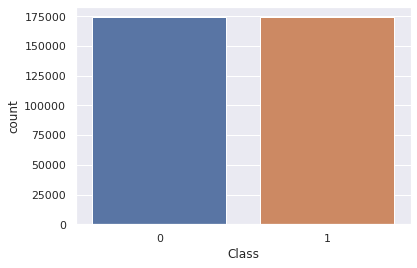

In [18]:
sns.set(style='darkgrid')
sns.countplot(y_new)

## We will be using this oversampled data set to train the models

In [19]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x_new,y_new,test_size=0.20,random_state=0,stratify=y_new)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(278649, 30) (278649,)
(69663, 30) (69663,)


# Step 4: Model Training

## Logistic Regression

In [20]:
lrm=LogisticRegression()
lrm.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
prediction_lrm=lrm.predict(x_orig)

In [22]:
print("Test Set Accuracy is ==> ",metrics.accuracy_score(y_test,lrm.predict(x_test)))

Test Set Accuracy is ==>  0.9704721301121112


## Now testing model against actual data(x_orig,y_orig) that we kept for testing

In [23]:
print("Actual test set Accuracy is ==> ",metrics.accuracy_score(y_orig,prediction_lrm))

Actual test set Accuracy is ==>  0.9985337911062137


Here, accuracy is not the correct measure of our model performance because test set also contains less number of fraud transactions and even if all the fraud transactions were classified into genuine category then also the accuracy would be great. So we will see the classification report and confusion matrix.

In [24]:
print("Classification Report on Hold Out Dataset==>\n\n",metrics.classification_report(y_orig,prediction_lrm))

Classification Report on Hold Out Dataset==>

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    109676
           1       0.44      0.80      0.57       131

    accuracy                           1.00    109807
   macro avg       0.72      0.90      0.78    109807
weighted avg       1.00      1.00      1.00    109807



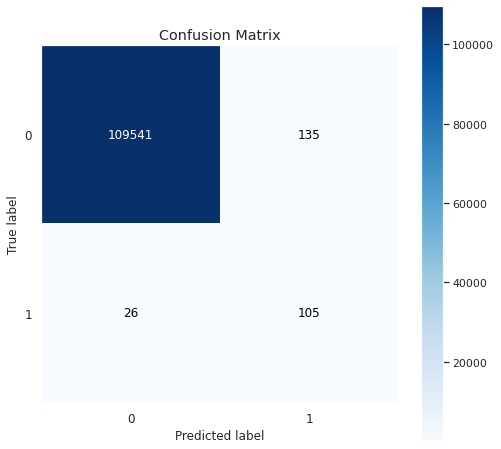

In [25]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_orig,prediction_lrm,figsize=(8,8))

## Decision Tree

In [26]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [27]:
print("Test Set Accuracy is ==> ",metrics.accuracy_score(y_test,dt.predict(x_test)))

Test Set Accuracy is ==>  0.9981769375421673


## Now testing model against actual data(x_orig,y_orig) that we kept for testing

In [28]:
print("Actual test Set Accuracy is ==> ",metrics.accuracy_score(y_orig,dt.predict(x_orig)))

Actual test Set Accuracy is ==>  0.9975502472519967


In [29]:
print("Classification Report on Hold Out Dataset==>\n\n",metrics.classification_report(y_orig,dt.predict(x_orig)))

Classification Report on Hold Out Dataset==>

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    109676
           1       0.28      0.67      0.40       131

    accuracy                           1.00    109807
   macro avg       0.64      0.83      0.70    109807
weighted avg       1.00      1.00      1.00    109807



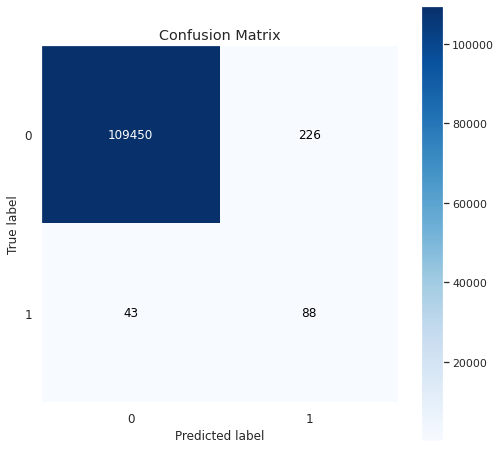

In [30]:
skplt.metrics.plot_confusion_matrix(y_orig,dt.predict(x_orig),figsize=(8,8))

## Random Forest Classifier

In [31]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
print("Test Set Accuracy is ==> ",metrics.accuracy_score(y_test,rfc.predict(x_test)))

Test Set Accuracy is ==>  0.9998851614199791


In [33]:
prediction_rfc=rfc.predict(x_orig)

In [34]:
print("Actual test Set Accuracy is ==> ",metrics.accuracy_score(y_orig,prediction_rfc))

Actual test Set Accuracy is ==>  0.999599296948282


In [35]:
print("Classification Report on Hold Out Dataset==>\n\n",metrics.classification_report(y_orig,prediction_rfc))


Classification Report on Hold Out Dataset==>

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    109676
           1       0.90      0.75      0.82       131

    accuracy                           1.00    109807
   macro avg       0.95      0.87      0.91    109807
weighted avg       1.00      1.00      1.00    109807



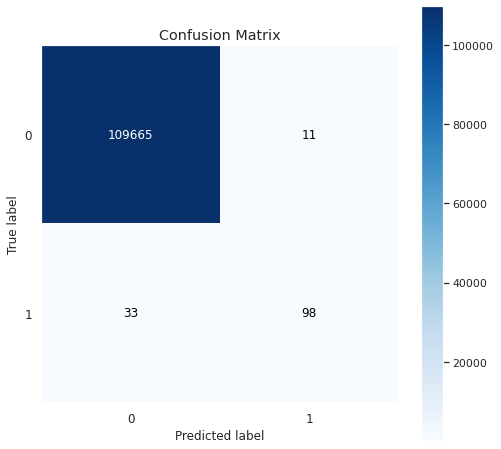

In [36]:
skplt.metrics.plot_confusion_matrix(y_orig,prediction_rfc,figsize=(8,8))